In [33]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [36]:
!pip install feature_engine
from feature_engine.outliers import Winsorizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
#Loading Dataset
df = pd.read_csv('OnlineRetail.csv',encoding='unicode_escape')

In [6]:
#Type casting - converting to desired data type
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
#Displaying 5 rows of dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [9]:
#Here we can see CustomerID is of float64 instead of object so we convert it
df.CustomerID = df.CustomerID.astype('str')

In [10]:
#Now checking datatypes
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

In [11]:
#Handling Duplicates
dup = df.duplicated()
sum(dup)
#Around 5268 duplicate values are present

5268

In [12]:
#Parameter keep is used to limit duplicates
#keep = False deletes all duplicates
#keep = last keeps last occurence and deletes rest
#keep = first keeps first occurence & deletes rest

In [13]:
#Removing duplicate rows
df1 = df.drop_duplicates(keep = 'first')

In [14]:
#Verifying if duplicates present
sum(df1.duplicated())
#No duplicate rows now

0

In [15]:
#Removing Duplicate columns if any
df1.corr()
#Little to no correlation b/w unitprice and quantity which are the only 2 numerical columns

,Quantity,UnitPrice
Quantity,1.000000,-0.001241
UnitPrice,-0.001241,1.000000


EDA

<AxesSubplot:ylabel='Frequency'>

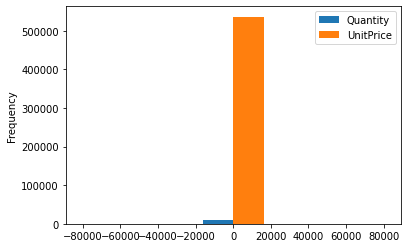

In [16]:
df1.plot.hist()
#The Frequnecy for UnitPrice can exceed 500000 
#The Frequency of  Quantity is very less than 100000

In [18]:
print(df1.Quantity.mean())
print(df1.UnitPrice.mean())

#Average quantity in the dataset is 9.620029032444409 and for unit price it is 4.632655674836623

9.620029032444409
4.632655674836623


In [20]:
print(df1.Quantity.mode())
print(df1.UnitPrice.mode())

#The most repeated quantity is 1 and unit price is 1.25

0    1
dtype: int64
0    1.25
dtype: float64


In [21]:
print(df1.Quantity.median())
print(df1.UnitPrice.median())

3.0
2.08


In [22]:
print(df1.Quantity.std())
print(df1.UnitPrice.std())
print(df1.Quantity.var())
print(df1.UnitPrice.var())

219.13015613073304
97.23311763777482
48018.02532587944
9454.279165561356


In [23]:
df1.Quantity.skew()
#Data is negatively skewed

-0.2639207787329176

In [24]:
df1.UnitPrice.skew()
#Data is positively skewed

185.60044812920344

In [25]:
print(df1.Quantity.kurt())
print(df1.UnitPrice.kurt())
#Both have +ve kurtosis with thin peak

118645.54455234332
58433.135910585086


<AxesSubplot:>

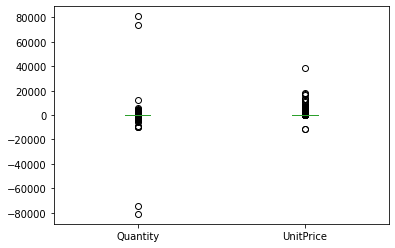

In [26]:
df1.plot.box()
#There are presence of outliers in the data which need to be addressed

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Quantity'>

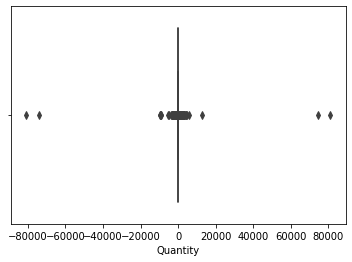

In [27]:
#Outlier Treatment on Quantity Column
sns.boxplot(df1.Quantity)
#Presence of outliers confirmed

In [42]:
#Winsorization on Quantity column
winsor_iqr_q = Winsorizer(capping_method = 'iqr',
                        tail = 'both',
                        fold = 1.5,
                        variables = ['Quantity'])
df_w = winsor_iqr_q.fit_transform(df1[['Quantity']])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Quantity'>

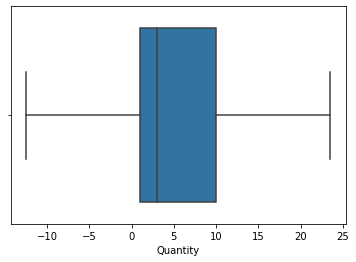

In [43]:
sns.boxplot(df_w.Quantity)
#Outliers removed

In [49]:
#Adding winsorized value to df1
df1['Quantity'] = df_w['Quantity']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Quantity'>

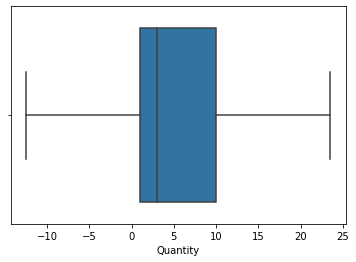

In [50]:
sns.boxplot(df1.Quantity)
#Outliers removed

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='UnitPrice'>

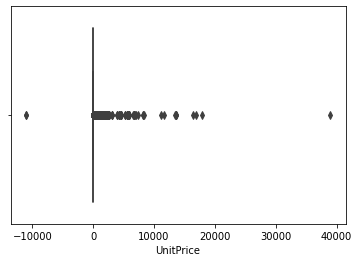

In [44]:
#Outlier Treatment on UnitPrice Column
sns.boxplot(df1.UnitPrice)
#Presence of outliers confirmed

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='UnitPrice'>

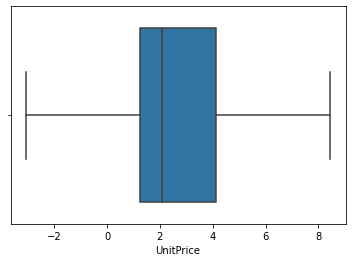

In [52]:
#Winsorization on UnitPrice column
winsor_iqr_up = Winsorizer(capping_method = 'iqr',
                        tail = 'both',
                        fold = 1.5,
                        variables = ['UnitPrice'])
df_w_1 = winsor_iqr_up.fit_transform(df1[['UnitPrice']])
sns.boxplot(df_w_1.UnitPrice)
#Outliers have been removed

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='UnitPrice'>

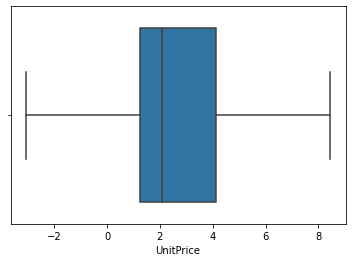

In [53]:
#Adding winsorized value to df1
df1['UnitPrice'] = df_w_1['UnitPrice']
sns.boxplot(df1.UnitPrice)
#Outiers have been removed